In [1]:
# Libraries for data manipulation and visualization
import pandas as pd # for data manipulation 
import numpy as np # for data manipulation 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

# Libraries for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# Success metrics for the models
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features 
from sklearn.model_selection import train_test_split,cross_val_score #splitting the dataset into test-train
from sklearn.model_selection import GridSearchCV #GridSearchCV parameter optimization

# Statistical libraries
import researchpy as rp #!pip install researchpy
from scipy.stats import shapiro,kruskal
import pylab

# Algorithms for using supervised learning methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from warnings import filterwarnings
filterwarnings('ignore')

Creating the Dataset from CSVs

Part 1: Animal Products Datasets

In [2]:
df_fish_seafood_production = pd.read_csv("fish-seafood-production.csv")
df_fish_seafood_production.head()

,Entity,Code,Year,Fish and seafood | 00002960 || Production | 005511 || tonnes
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0


In [3]:
df_global_meat_production = pd.read_csv("global-meat-production-by-livestock-type.csv")
df_global_meat_production.head()

,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, duck | 00001069 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes"
0,Afghanistan,AFG,1961,4000.0,NaN,NaN,3600.0,NaN,73220.0,43000.0,NaN,5600.0
1,Afghanistan,AFG,1962,4000.0,NaN,NaN,4031.0,NaN,72375.0,45800.0,NaN,6000.0
2,Afghanistan,AFG,1963,5000.0,NaN,NaN,5031.0,NaN,75530.0,47250.0,NaN,6160.0
3,Afghanistan,AFG,1964,5000.0,NaN,NaN,4680.0,NaN,79750.0,48000.0,NaN,6400.0
4,Afghanistan,AFG,1965,6000.0,NaN,NaN,4320.0,NaN,84375.0,48700.0,NaN,6800.0


Part 2: Grain Products Datasets

In [4]:
df_barley_production = pd.read_csv("barley-production.csv")
df_barley_production.head()

,Entity,Code,Year,Barley | 00000044 || Production | 005510 || tonnes
0,Afghanistan,AFG,1961,378000
1,Afghanistan,AFG,1962,378000
2,Afghanistan,AFG,1963,378000
3,Afghanistan,AFG,1964,380000
4,Afghanistan,AFG,1965,380000


In [5]:
df_cereal_production = pd.read_csv("cereal-production.csv")
df_cereal_production.head()

,Entity,Code,Year,Cereals | 00001717 || Production | 005510 || tonnes
0,Afghanistan,AFG,1961,3695000
1,Afghanistan,AFG,1962,3696000
2,Afghanistan,AFG,1963,3378000
3,Afghanistan,AFG,1964,3732000
4,Afghanistan,AFG,1965,3785000


In [6]:
df_wheat_production = pd.read_csv("wheat-production.csv")
df_wheat_production.head()

,Entity,Code,Year,Wheat | 00000015 || Production | 005510 || tonnes
0,Afghanistan,AFG,1961,2279000
1,Afghanistan,AFG,1962,2279000
2,Afghanistan,AFG,1963,1947000
3,Afghanistan,AFG,1964,2230000
4,Afghanistan,AFG,1965,2282000


In [7]:
df_rye_production = pd.read_csv("rye-production.csv")
df_rye_production.head()

,Entity,Code,Year,Rye | 00000071 || Production | 005510 || tonnes
0,Africa,NaN,1961,10290
1,Africa,NaN,1962,9100
2,Africa,NaN,1963,13800
3,Africa,NaN,1964,16100
4,Africa,NaN,1965,13900


Filtering Data for Ireland and Other Countries

Merging Grain Dataframes from Filtered Ireland Data

In [8]:
df_fish_seafood_production_ireland = df_fish_seafood_production[(df_fish_seafood_production.Code=='IRL') |
                                                                (df_fish_seafood_production.Code=='FRA') |
                                                                (df_fish_seafood_production.Code=='ITA') |
                                                                (df_fish_seafood_production.Code=='GBR') |
                                                                (df_fish_seafood_production.Code=='ESP') |
                                                                (df_fish_seafood_production.Code=='NLD') |
                                                                (df_fish_seafood_production.Code=='DEU') |
                                                                (df_fish_seafood_production.Code=='PRT') |
                                                                (df_fish_seafood_production.Code=='DNK')].reset_index(drop=True)

In [9]:
df_global_meat_production_ireland = df_global_meat_production[(df_global_meat_production.Code=='IRL') |
                                                              (df_global_meat_production.Code=='FRA') |
                                                              (df_global_meat_production.Code=='ITA') |
                                                              (df_global_meat_production.Code=='GBR') |
                                                              (df_global_meat_production.Code=='ESP') |
                                                              (df_global_meat_production.Code=='NLD') |
                                                              (df_global_meat_production.Code=='DEU') |
                                                              (df_global_meat_production.Code=='PRT') |
                                                              (df_global_meat_production.Code=='DNK')].reset_index(drop=True)
df_global_meat_production_ireland.head()

,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, duck | 00001069 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes"
0,Denmark,DNK,1961,3300.0,5000.0,3600.0,NaN,600.0,1200.0,140500.0,614300.0,83350.0
1,Denmark,DNK,1962,3600.0,3200.0,2100.0,NaN,600.0,1100.0,177800.0,632100.0,88990.0
2,Denmark,DNK,1963,3200.0,2000.0,2300.0,NaN,400.0,1100.0,180100.0,645400.0,81220.0
3,Denmark,DNK,1964,4000.0,2400.0,2100.0,NaN,400.0,1200.0,156500.0,688000.0,95150.0
4,Denmark,DNK,1965,4500.0,3000.0,1700.0,NaN,600.0,1400.0,154400.0,744000.0,83800.0


In [10]:
fish_df = df_fish_seafood_production_ireland[["Fish and seafood | 00002960 || Production | 005511 || tonnes"]].reset_index(drop=True)
merged_animal_df = pd.concat([df_global_meat_production_ireland,fish_df],axis=1).reset_index(drop=True)
merged_animal_df.head()

,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, duck | 00001069 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes",Fish and seafood | 00002960 || Production | 005511 || tonnes
0,Denmark,DNK,1961,3300.0,5000.0,3600.0,NaN,600.0,1200.0,140500.0,614300.0,83350.0,637490.0
1,Denmark,DNK,1962,3600.0,3200.0,2100.0,NaN,600.0,1100.0,177800.0,632100.0,88990.0,785100.0
2,Denmark,DNK,1963,3200.0,2000.0,2300.0,NaN,400.0,1100.0,180100.0,645400.0,81220.0,847900.0
3,Denmark,DNK,1964,4000.0,2400.0,2100.0,NaN,400.0,1200.0,156500.0,688000.0,95150.0,871060.0
4,Denmark,DNK,1965,4500.0,3000.0,1700.0,NaN,600.0,1400.0,154400.0,744000.0,83800.0,840830.0


In [11]:
merged_animal_df.Code.value_counts()

DNK    60
FRA    60
DEU    60
IRL    60
ITA    60
NLD    60
PRT    60
ESP    60
GBR    60
Name: Code, dtype: int64

Merging Grain Dataframes from Filtered Ireland Data

In [12]:
df_rye_production_ireland = df_rye_production[(df_rye_production.Code=='IRL') |
                                              (df_rye_production.Code=='FRA') |
                                              (df_rye_production.Code=='ITA') |
                                              (df_rye_production.Code=='GBR') |
                                              (df_rye_production.Code=='ESP') |
                                              (df_rye_production.Code=='NLD') |
                                              (df_rye_production.Code=='DEU') |
                                              (df_rye_production.Code=='PRT') |
                                              (df_rye_production.Code=='DNK')].reset_index(drop=True)
df_rye_production_ireland.head()

,Entity,Code,Year,Rye | 00000071 || Production | 005510 || tonnes
0,Denmark,DNK,1961,513876
1,Denmark,DNK,1962,512262
2,Denmark,DNK,1963,319871
3,Denmark,DNK,1964,291633
4,Denmark,DNK,1965,264340


In [13]:
df_barley_production_ireland = df_barley_production[(df_barley_production.Code=='IRL') |
                                                    (df_barley_production.Code=='FRA') |
                                                    (df_barley_production.Code=='ITA') |
                                                    (df_barley_production.Code=='GBR') |
                                                    (df_barley_production.Code=='ESP') |
                                                    (df_barley_production.Code=='NLD') |
                                                    (df_barley_production.Code=='DEU') |
                                                    (df_barley_production.Code=='PRT') |
                                                    (df_barley_production.Code=='DNK')].reset_index(drop=True)
df_barley_production_ireland.head()

,Entity,Code,Year,Barley | 00000044 || Production | 005510 || tonnes
0,Denmark,DNK,1961,2808149
1,Denmark,DNK,1962,3299515
2,Denmark,DNK,1963,3398857
3,Denmark,DNK,1964,3899590
4,Denmark,DNK,1965,4125804


In [14]:
df_cereal_production_ireland = df_cereal_production[(df_cereal_production.Code=='IRL') |
                                                    (df_cereal_production.Code=='FRA') |
                                                    (df_cereal_production.Code=='ITA') |
                                                    (df_cereal_production.Code=='GBR') |
                                                    (df_cereal_production.Code=='ESP') |
                                                    (df_cereal_production.Code=='NLD') |
                                                    (df_cereal_production.Code=='DEU') |
                                                    (df_cereal_production.Code=='PRT') |
                                                    (df_cereal_production.Code=='DNK')].reset_index(drop=True)
df_cereal_production_ireland.head()

,Entity,Code,Year,Cereals | 00001717 || Production | 005510 || tonnes
0,Denmark,DNK,1961,5198900
1,Denmark,DNK,1962,5783409
2,Denmark,DNK,1963,5502930
3,Denmark,DNK,1964,6213090
4,Denmark,DNK,1965,6213087


In [15]:
df_wheat_production_ireland = df_wheat_production[(df_wheat_production.Code=='IRL') |
                                                  (df_wheat_production.Code=='FRA') |
                                                  (df_wheat_production.Code=='ITA') |
                                                  (df_wheat_production.Code=='GBR') |
                                                  (df_wheat_production.Code=='ESP') |
                                                  (df_wheat_production.Code=='NLD') |
                                                  (df_wheat_production.Code=='DEU') |
                                                  (df_wheat_production.Code=='PRT') |
                                                  (df_wheat_production.Code=='DNK')].reset_index(drop=True)
df_wheat_production_ireland.head()

,Entity,Code,Year,Wheat | 00000015 || Production | 005510 || tonnes
0,Denmark,DNK,1961,434057
1,Denmark,DNK,1962,643992
2,Denmark,DNK,1963,494060
3,Denmark,DNK,1964,541454
4,Denmark,DNK,1965,563769


In [16]:
wheat_df = df_wheat_production_ireland[["Wheat | 00000015 || Production | 005510 || tonnes"]].reset_index(drop=True)
cereal_df = df_cereal_production_ireland[["Cereals | 00001717 || Production | 005510 || tonnes"]].reset_index(drop=True)
barley_df = df_barley_production_ireland[["Barley | 00000044 || Production | 005510 || tonnes"]].reset_index(drop=True)
merged_grain_df = pd.concat([df_rye_production_ireland,wheat_df,cereal_df,barley_df],axis=1).reset_index(drop=True)
merged_grain_df.head()

,Entity,Code,Year,Rye | 00000071 || Production | 005510 || tonnes,Wheat | 00000015 || Production | 005510 || tonnes,Cereals | 00001717 || Production | 005510 || tonnes,Barley | 00000044 || Production | 005510 || tonnes
0,Denmark,DNK,1961,513876,434057,5198900,2808149
1,Denmark,DNK,1962,512262,643992,5783409,3299515
2,Denmark,DNK,1963,319871,494060,5502930,3398857
3,Denmark,DNK,1964,291633,541454,6213090,3899590
4,Denmark,DNK,1965,264340,563769,6213087,4125804


In [17]:
merged_grain_df.Entity.value_counts()

Denmark           60
France            60
Germany           60
Ireland           60
Italy             60
Netherlands       60
Portugal          60
Spain             60
United Kingdom    60
Name: Entity, dtype: int64

Merging Grain and Animal Dataframes

In [18]:
grain_df_filtered = merged_grain_df[["Rye | 00000071 || Production | 005510 || tonnes",
                                     "Wheat | 00000015 || Production | 005510 || tonnes",
                                     "Cereals | 00001717 || Production | 005510 || tonnes",
                                     "Barley | 00000044 || Production | 005510 || tonnes"]].reset_index(drop=True)
final_merged_df = pd.concat([merged_animal_df,grain_df_filtered],axis=1).reset_index(drop=True)
final_merged_df.head()

,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, duck | 00001069 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, camel | 00001127 || Production | 005510 || tonnes","Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes",Fish and seafood | 00002960 || Production | 005511 || tonnes,Rye | 00000071 || Production | 005510 || tonnes,Wheat | 00000015 || Production | 005510 || tonnes,Cereals | 00001717 || Production | 005510 || tonnes,Barley | 00000044 || Production | 005510 || tonnes
0,Denmark,DNK,1961,3300.0,5000.0,3600.0,NaN,600.0,1200.0,140500.0,614300.0,83350.0,637490.0,513876,434057,5198900,2808149
1,Denmark,DNK,1962,3600.0,3200.0,2100.0,NaN,600.0,1100.0,177800.0,632100.0,88990.0,785100.0,512262,643992,5783409,3299515
2,Denmark,DNK,1963,3200.0,2000.0,2300.0,NaN,400.0,1100.0,180100.0,645400.0,81220.0,847900.0,319871,494060,5502930,3398857
3,Denmark,DNK,1964,4000.0,2400.0,2100.0,NaN,400.0,1200.0,156500.0,688000.0,95150.0,871060.0,291633,541454,6213090,3899590
4,Denmark,DNK,1965,4500.0,3000.0,1700.0,NaN,600.0,1400.0,154400.0,744000.0,83800.0,840830.0,264340,563769,6213087,4125804


In [19]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 17 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Entity                                                                   540 non-null    object 
 1   Code                                                                     540 non-null    object 
 2   Year                                                                     540 non-null    int64  
 3   Meat, game | 00001163 || Production | 005510 || tonnes                   314 non-null    float64
 4   Meat, duck | 00001069 || Production | 005510 || tonnes                   348 non-null    float64
 5   Meat, horse | 00001097 || Production | 005510 || tonnes                  525 non-null    float64
 6   Meat, camel | 00001127 || Production | 005510 || tonnes                  0

In [20]:
final_merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,540.0,1.990500e+03,1.733416e+01,1961.0,1975.75,1990.5,2005.25,2020.0
"Meat, game | 00001163 || Production | 005510 || tonnes",314.0,1.130514e+04,1.816946e+04,0.0,3000.00,4708.0,10000.00,90000.0
"Meat, duck | 00001069 || Production | 005510 || tonnes",348.0,3.768773e+04,6.715384e+04,2.0,3884.50,15000.0,33517.50,290902.0
"Meat, horse | 00001097 || Production | 005510 || tonnes",525.0,1.093995e+04,1.882282e+04,49.0,1200.00,3173.0,8008.00,108000.0
"Meat, camel | 00001127 || Production | 005510 || tonnes",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes",311.0,2.708675e+03,3.371214e+03,18.0,500.00,1222.0,3000.00,14750.0
"Meat, sheep and goat | 00001807 || Production | 005510 || tonnes",540.0,9.029345e+04,9.609058e+04,363.0,20923.00,46306.5,134347.75,402000.0
"Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes",540.0,7.426148e+05,5.494314e+05,45597.0,240915.75,593526.0,1143430.00,2180707.0
"Meat, pig | 00001035 || Production | 005510 || tonnes",540.0,1.451521e+06,1.288475e+06,75419.0,431379.00,1166683.0,1725486.75,5616074.0
"Meat, poultry | 00001808 || Production | 005510 || tonnes",540.0,6.885201e+05,5.984070e+05,14715.0,164207.00,556650.0,1055012.50,3247205.0


In [21]:
final_merged_df.skew().sort_values(ascending=False)

Meat, game | 00001163 || Production | 005510 || tonnes                     3.004394
Meat, duck | 00001069 || Production | 005510 || tonnes                     2.714708
Rye | 00000071 || Production | 005510 || tonnes                            2.612416
Meat, horse | 00001097 || Production | 005510 || tonnes                    2.609793
Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes    1.778854
Wheat | 00000015 || Production | 005510 || tonnes                          1.643500
Meat, pig | 00001035 || Production | 005510 || tonnes                      1.401369
Meat, sheep and goat | 00001807 || Production | 005510 || tonnes           1.326737
Cereals | 00001717 || Production | 005510 || tonnes                        1.275547
Meat, poultry | 00001808 || Production | 005510 || tonnes                  1.109284
Fish and seafood | 00002960 || Production | 005511 || tonnes               0.885435
Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes         0

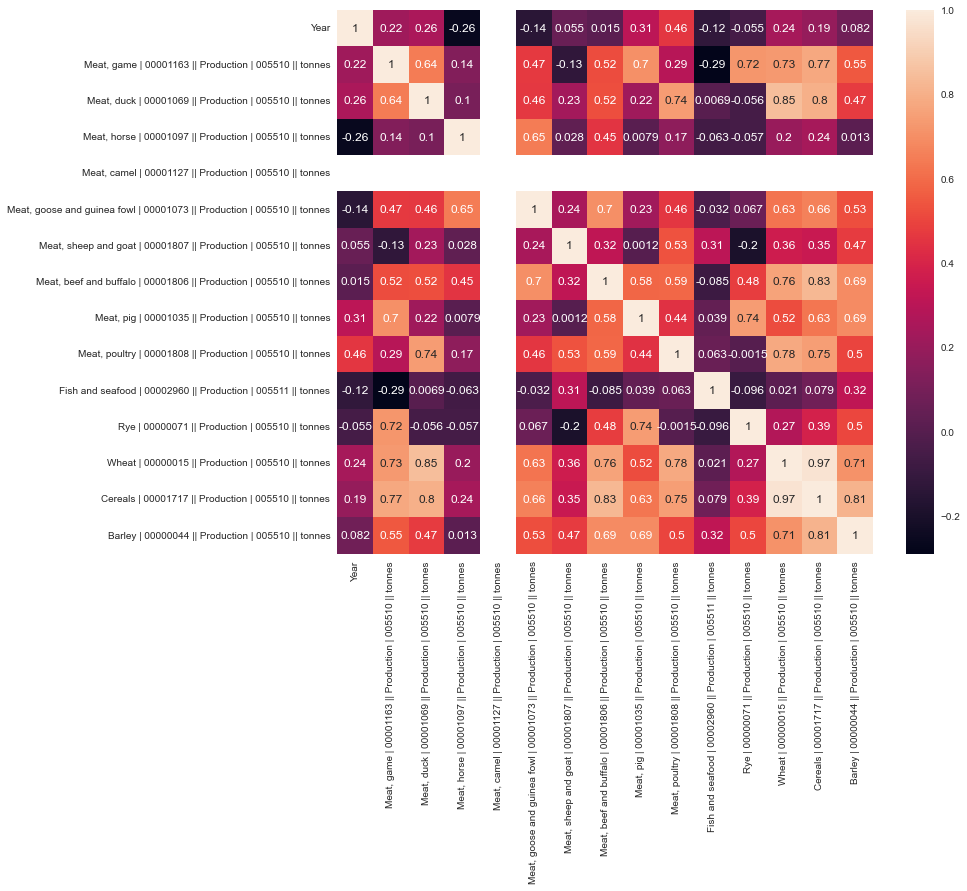

In [22]:

plt.figure(figsize=(12,10))
correlated_df=final_merged_df.corr()
sns.heatmap(correlated_df,annot=True)

plt.show()

In [23]:
percent_missing = round(final_merged_df.isnull().sum() * 100 / len(final_merged_df),3)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False).head(20)

# camel | 00001127 || Production | 005510 || tonnes column consists 100% missing values , therefore this column must be drop.
# Goose and Guinea Fowl, Game, Horse, Fish and Seafood contains some of the missing values for that reason they are going to filled with median values

,Missing_Percentage
"Meat, camel | 00001127 || Production | 005510 || tonnes",100.000
"Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes",42.407
"Meat, game | 00001163 || Production | 005510 || tonnes",41.852
"Meat, duck | 00001069 || Production | 005510 || tonnes",35.556
"Meat, horse | 00001097 || Production | 005510 || tonnes",2.778
Fish and seafood | 00002960 || Production | 005511 || tonnes,1.667
Entity,0.000
"Meat, poultry | 00001808 || Production | 005510 || tonnes",0.000
Cereals | 00001717 || Production | 005510 || tonnes,0.000
Wheat | 00000015 || Production | 005510 || tonnes,0.000


In [24]:
final_merged_df.drop(["Meat, camel | 00001127 || Production | 005510 || tonnes"],axis=1,inplace=True)

In [25]:
cols = ["Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes", 
        "Meat, game | 00001163 || Production | 005510 || tonnes",
       "Meat, duck | 00001069 || Production | 005510 || tonnes",
       "Meat, horse | 00001097 || Production | 005510 || tonnes",
       "Fish and seafood | 00002960 || Production | 005511 || tonnes"]
final_merged_df[cols]=final_merged_df[cols].fillna(final_merged_df.median().iloc[0])

In [26]:
final_merged_df.isnull().values.any() # No more missing values.

False

In [27]:
final_merged_df.head()

,Entity,Code,Year,"Meat, game | 00001163 || Production | 005510 || tonnes","Meat, duck | 00001069 || Production | 005510 || tonnes","Meat, horse | 00001097 || Production | 005510 || tonnes","Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes","Meat, sheep and goat | 00001807 || Production | 005510 || tonnes","Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes","Meat, pig | 00001035 || Production | 005510 || tonnes","Meat, poultry | 00001808 || Production | 005510 || tonnes",Fish and seafood | 00002960 || Production | 005511 || tonnes,Rye | 00000071 || Production | 005510 || tonnes,Wheat | 00000015 || Production | 005510 || tonnes,Cereals | 00001717 || Production | 005510 || tonnes,Barley | 00000044 || Production | 005510 || tonnes
0,Denmark,DNK,1961,3300.0,5000.0,3600.0,600.0,1200.0,140500.0,614300.0,83350.0,637490.0,513876,434057,5198900,2808149
1,Denmark,DNK,1962,3600.0,3200.0,2100.0,600.0,1100.0,177800.0,632100.0,88990.0,785100.0,512262,643992,5783409,3299515
2,Denmark,DNK,1963,3200.0,2000.0,2300.0,400.0,1100.0,180100.0,645400.0,81220.0,847900.0,319871,494060,5502930,3398857
3,Denmark,DNK,1964,4000.0,2400.0,2100.0,400.0,1200.0,156500.0,688000.0,95150.0,871060.0,291633,541454,6213090,3899590
4,Denmark,DNK,1965,4500.0,3000.0,1700.0,600.0,1400.0,154400.0,744000.0,83800.0,840830.0,264340,563769,6213087,4125804


In [28]:
final_merged_df.rename(columns={"Meat, game | 00001163 || Production | 005510 || tonnes":"Game/Tonnes",
                                       "Meat, duck | 00001069 || Production | 005510 || tonnes":"Duck/Tonnes",
                                       "Meat, horse | 00001097 || Production | 005510 || tonnes":"Horse /Tonnes",
                                       "Meat, goose and guinea fowl | 00001073 || Production | 005510 || tonnes":"Goose and Guinea Fowl/Tonnes",
                                       "Meat, sheep and goat | 00001807 || Production | 005510 || tonnes":"Sheep and Goat/Tonnes",
                                       "Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes":"Beef and Buffalo/Tonnes",
                                       "Meat, pig | 00001035 || Production | 005510 || tonnes":"Pig/Tonnes",
                                       "Meat, poultry | 00001808 || Production | 005510 || tonnes":"Poultry/Tonnes",
                                       "Fish and seafood | 00002960 || Production | 005511 || tonnes":"Fish and Seafood/Tonnes",
                                       "Rye | 00000071 || Production | 005510 || tonnes":"Rye/Tonnes",
                                       "Wheat | 00000015 || Production | 005510 || tonnes":"Wheat/Tonnes",
                                       "Cereals | 00001717 || Production | 005510 || tonnes":"Cereals/Tonnes",
                                       "Barley | 00000044 || Production | 005510 || tonnes":"Barley/Tonnes"},inplace=True
        
                                       
                                      )

Exploratory Data Analysis

In [29]:
filter_by_year_all_countries = final_merged_df[(final_merged_df.Year >=2010) & (final_merged_df.Year <2015)]
df = filter_by_year_all_countries.groupby(['Year','Entity']).agg({'Wheat/Tonnes':[np.mean],
                                                                 'Fish and Seafood/Tonnes':[np.mean],
                                                                 'Rye/Tonnes':[np.mean],
                                                                 'Beef and Buffalo/Tonnes':[np.mean],
                                                                 'Sheep and Goat/Tonnes':[np.mean],
                                                                 'Barley/Tonnes':[np.mean],
                                                                 'Poultry/Tonnes':[np.mean]})
df.head(50)

Wheat/Tonnes Fish and Seafood/Tonnes Rye/Tonnes  \
                            mean                    mean       mean   
Year Entity                                                           
2010 Denmark           5059900.0                863260.0   254700.0   
     France           38207431.0                647180.0   151038.0   
     Germany          23782955.0                240770.0  2900438.0   
     Ireland            669200.0                280610.0      581.0   
     Italy             7141926.0                353180.0    11529.0   
     Netherlands       1369553.0                447180.0    10242.0   
     Portugal            82577.0                194000.0    17553.0   
     Spain             5941197.0               1264820.0   258380.0   
     United Kingdom   14877835.0                959210.0    38000.0   
2011 Denmark           4831000.0                751300.0   294300.0   
     France           35992794.0                636320.0   124422.0   
     Germany          22782700.0                260400.0  2520900.0   
     Ireland            929200.0                308030.0      587.0   
     Italy             7394495.0                353180.0    13183.0   
     Netherlands       1175275.0                431870.0     6411.0   
     Portugal            51003.0                189560.0    18388.0   
     Spain             6876657.0               1264820.0   366700.0   
     United Kingdom   15257083.0                959210.0    37000.0   
2012 Denmark           4525100.0                536380.0   384400.0   
     France           37885742.0                670370.0   160301.0   
     Germany          22409300.0                268780.0  3878400.0   
     Ireland            707900.0                274450.0      600.0   
     Italy             8037872.0                346100.0    13170.0   
     Netherlands       1302002.0                562590.0     9225.0   
     Portugal            58990.0                189560.0    14784.0   
     Spain             5189828.0               1264820.0   256675.0   
     United Kingdom   13261000.0                  1990.5    33000.0   
2013 Denmark           4145200.0                704390.0   526800.0   
     France           38651472.0                676620.0   143076.0   
     Germany          25019100.0                291650.0  4689100.0   
     Ireland            545300.0                270550.0      600.0   
     Italy             6966465.0                321200.0    11097.0   
     Netherlands       1335105.0                562590.0     6706.0   
     Portugal            92014.0                189560.0    18210.0   
     Spain             7744900.0                881440.0   384300.0   
     United Kingdom   11921304.0                  1990.5    35000.0   
2014 Denmark           5153300.0                779430.0   677800.0   
     France           38950202.0                648680.0   128197.0   
     Germany          27784700.0                312990.0  3854400.0   
     Ireland            717000.0                292220.0      604.0   
     Italy             7104650.0                361000.0    10960.0   
     Netherlands       1304054.0                562590.0     7106.0   
     Portugal            98794.0                957200.0    17629.0   
     Spain             6471400.0                931300.0   290970.0   
     United Kingdom   16606009.0                  1990.5    55899.0   

                    Beef and Buffalo/Tonnes Sheep and Goat/Tonnes  \
                                       mean                  mean   
Year Entity                                                         
2010 Denmark                       132500.0                1726.0   
     France                       1530258.0              130782.0   
     Germany                      1205002.0               38856.0   
     Ireland                       559100.0               47700.0   
     Italy                        1075333.0               54343.0   
     Netherlands                   388610.0               1

In [30]:
percent_missing = round(final_merged_df.isnull().sum() * 100 / len(final_merged_df),3)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False).head(20)

,Missing_Percentage
Entity,0.0
Code,0.0
Year,0.0
Game/Tonnes,0.0
Duck/Tonnes,0.0
Horse /Tonnes,0.0
Goose and Guinea Fowl/Tonnes,0.0
Sheep and Goat/Tonnes,0.0
Beef and Buffalo/Tonnes,0.0
Pig/Tonnes,0.0


Visualization for All Countries

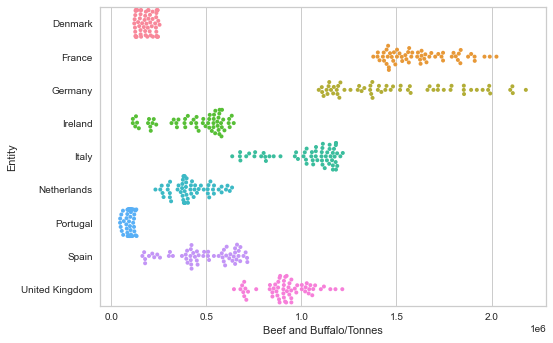

In [31]:
sns.swarmplot(y="Entity", x= "Beef and Buffalo/Tonnes", data = final_merged_df, size=4);

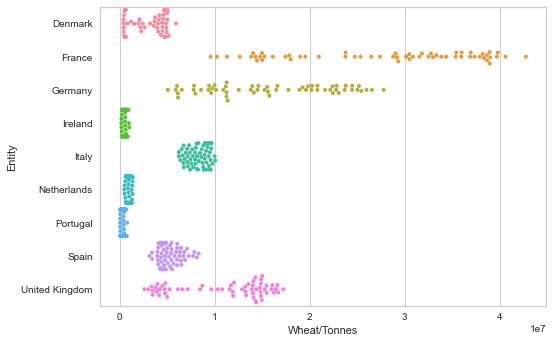

In [32]:
sns.swarmplot(y="Entity", x= "Wheat/Tonnes", data = final_merged_df, size=4);

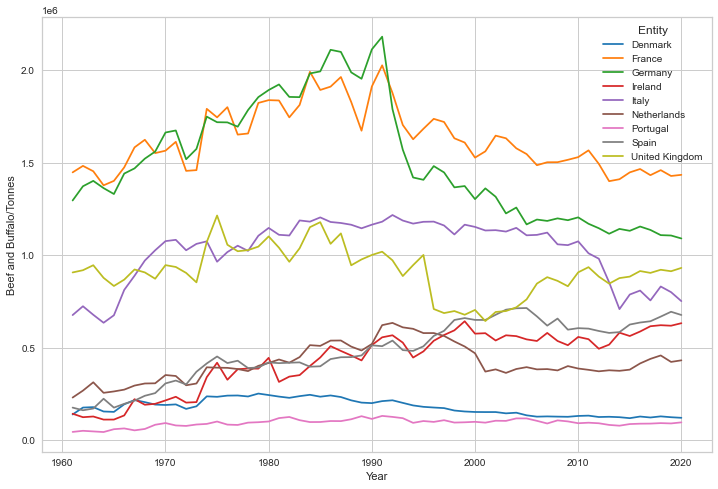

In [33]:
plt.figure(figsize=(12,8))
sns.lineplot(data=final_merged_df,x='Year', y='Beef and Buffalo/Tonnes', hue='Entity',palette='tab10');

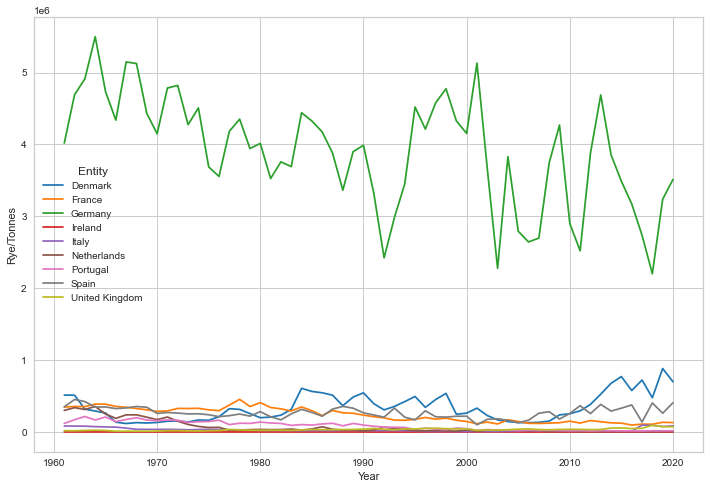

In [34]:
plt.figure(figsize=(12,8))
sns.lineplot(data=final_merged_df,x='Year', y='Rye/Tonnes', hue='Entity',palette='tab10');

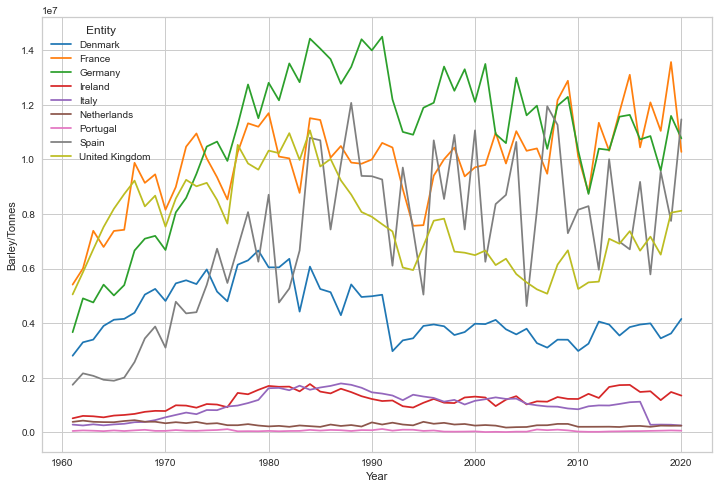

In [35]:
plt.figure(figsize=(12,8))
sns.lineplot(data=final_merged_df,x='Year', y='Barley/Tonnes', hue='Entity',palette='tab10');

In [40]:
final_merged_df.head()

,Entity,Code,Year,Game/Tonnes,Duck/Tonnes,Horse /Tonnes,Goose and Guinea Fowl/Tonnes,Sheep and Goat/Tonnes,Beef and Buffalo/Tonnes,Pig/Tonnes,Poultry/Tonnes,Fish and Seafood/Tonnes,Rye/Tonnes,Wheat/Tonnes,Cereals/Tonnes,Barley/Tonnes
0,Denmark,DNK,1961,3300.0,5000.0,3600.0,600.0,1200.0,140500.0,614300.0,83350.0,637490.0,513876,434057,5198900,2808149
1,Denmark,DNK,1962,3600.0,3200.0,2100.0,600.0,1100.0,177800.0,632100.0,88990.0,785100.0,512262,643992,5783409,3299515
2,Denmark,DNK,1963,3200.0,2000.0,2300.0,400.0,1100.0,180100.0,645400.0,81220.0,847900.0,319871,494060,5502930,3398857
3,Denmark,DNK,1964,4000.0,2400.0,2100.0,400.0,1200.0,156500.0,688000.0,95150.0,871060.0,291633,541454,6213090,3899590
4,Denmark,DNK,1965,4500.0,3000.0,1700.0,600.0,1400.0,154400.0,744000.0,83800.0,840830.0,264340,563769,6213087,4125804


In [41]:
final_merged_df.to_csv("final_merged_df.csv")

Visualization according to Chosen Country Name

In [ ]:
country_name_ireland = final_merged_df[final_merged_df.Entity == 'Ireland']

f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(country_name_ireland["Beef and Buffalo/Tonnes"],bins=20,ax=ax[0,0]);

sns.distplot(country_name_ireland["Poultry/Tonnes"],bins=20,ax=ax[0,1]);

sns.distplot(country_name_ireland["Fish and Seafood/Tonnes"],bins=20,ax=ax[0,2]);

sns.distplot(country_name_ireland["Rye/Tonnes"],bins=20,ax=ax[1,0]);

sns.distplot(country_name_ireland["Wheat/Tonnes"],bins=20,ax=ax[1,1]);

sns.distplot(country_name_ireland["Barley/Tonnes"],bins=20,ax=ax[1,2]);

In [ ]:
country_name_spain = final_merged_df[final_merged_df.Entity == 'Spain']

f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(country_name_spain["Beef and Buffalo/Tonnes"],bins=20,ax=ax[0,0]);

sns.distplot(country_name_spain["Poultry/Tonnes"],bins=20,ax=ax[0,1]);

sns.distplot(country_name_spain["Fish and Seafood/Tonnes"],bins=20,ax=ax[0,2]);

sns.distplot(country_name_spain["Rye/Tonnes"],bins=20,ax=ax[1,0]);

sns.distplot(country_name_spain["Wheat/Tonnes"],bins=20,ax=ax[1,1]);

sns.distplot(country_name_spain["Barley/Tonnes"],bins=20,ax=ax[1,2]);

In [ ]:
filter_by_year = country_name_ireland[(country_name_ireland.Year >=2005) & (country_name_ireland.Year <=2020)]
sns.scatterplot(data= filter_by_year, x='Barley/Tonnes',
               y='Beef and Buffalo/Tonnes',
               hue='Year',palette='tab20');

In [ ]:
filter_by_year = country_name_spain[(country_name_spain.Year >=2005) & (country_name_spain.Year <=2020)]
sns.scatterplot(data= filter_by_year, x='Barley/Tonnes',
               y='Beef and Buffalo/Tonnes',
               hue='Year',palette='tab20');

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=country_name_ireland,x='Year', y='Barley/Tonnes',label='Barley',color='blue');
sns.lineplot(data=country_name_ireland,x='Year', y='Beef and Buffalo/Tonnes',label='Beef-Buffalo');
sns.lineplot(data=country_name_ireland,x='Year', y='Rye/Tonnes',label='Rye');
sns.lineplot(data=country_name_ireland,x='Year', y='Fish and Seafood/Tonnes',label='Fish-Seafood');
sns.lineplot(data=country_name_ireland,x='Year', y='Cereals/Tonnes',label='Cereals');
sns.lineplot(data=country_name_ireland,x='Year', y='Goose and Guinea Fowl/Tonnes',label='Goose-Guinea');
sns.lineplot(data=country_name_ireland,x='Year', y='Pig/Tonnes',label='Pig');
sns.lineplot(data=country_name_ireland,x='Year', y='Wheat/Tonnes',label='Wheat',color='red');

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=country_name_spain,x='Year', y='Barley/Tonnes',label='Barley',color='blue');
sns.lineplot(data=country_name_spain,x='Year', y='Beef and Buffalo/Tonnes',label='Beef-Buffalo');
sns.lineplot(data=country_name_spain,x='Year', y='Rye/Tonnes',label='Rye');
sns.lineplot(data=country_name_spain,x='Year', y='Fish and Seafood/Tonnes',label='Fish-Seafood');
sns.lineplot(data=country_name_spain,x='Year', y='Cereals/Tonnes',label='Cereals');
sns.lineplot(data=country_name_spain,x='Year', y='Goose and Guinea Fowl/Tonnes',label='Goose-Guinea');
sns.lineplot(data=country_name_spain,x='Year', y='Pig/Tonnes',label='Pig');
sns.lineplot(data=country_name_spain,x='Year', y='Wheat/Tonnes',label='Wheat',color='red');

Statistical Tests

In [ ]:
country_name_ireland.head()

In [ ]:
country_name_spain.head()

Non-Parametric Hypothesis Test
* H0: There is no correlation between the two variables: ρ = 0
* Ha: There is a nonzero correlation between the two variables: ρ ≠ 0 (when p<0.05)

In [ ]:
import scipy

In [ ]:
scipy.stats.spearmanr(country_name_ireland["Barley/Tonnes"],
                country_name_ireland["Beef and Buffalo/Tonnes"])

# pvalue < 0.05, H0 rejected, H1 (alternative) hypothesis is accepted.
# There is non-zero positive correlation between "barley" and "meat,beef and buffalo" features.

In [ ]:
test_statistics, pvalue = scipy.stats.kendalltau(country_name_ireland["Barley/Tonnes"],
                                            country_name_ireland["Beef and Buffalo/Tonnes"])

print('KendallTau Correlation Coefficient = %.4f, p-value = %.4f' % (test_statistics, pvalue))

In [ ]:
sns.relplot(x="Barley/Tonnes",
            y="Beef and Buffalo/Tonnes",data=country_name_ireland,kind="line");

In [ ]:
scipy.stats.spearmanr(country_name_spain["Barley/Tonnes"],
                country_name_spain["Beef and Buffalo/Tonnes"])

# pvalue < 0.05, H0 rejected, H1 (alternative) hypothesis is accepted.
# There is non-zero positive correlation between "barley" and "meat,beef and buffalo" features.

In [ ]:
test_statistics, pvalue = scipy.stats.kendalltau(country_name_spain["Barley/Tonnes"],
                                            country_name_spain["Beef and Buffalo/Tonnes"])

print('KendallTau Correlation Coefficient = %.4f, p-value = %.4f' % (test_statistics, pvalue))

In [ ]:
sns.relplot(x="Barley/Tonnes",
            y="Beef and Buffalo/Tonnes",data=country_name_spain,kind="line");

One sample T-Test
* The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. The One Sample t Test is a parametric test.

* Assumptions

1- Observations in each sample are independent and identically distributed (iid).<br>
2- Observations in each sample are normally distributed.<br>
3- Observations in each sample have the same variance.<br>
* Interpretation

1- H0: the means of the samples are equal. <br>
2- H1: the means of the samples are unequal.<br>


* H0: Average barley production is 100.000.000
* H1: Average barley production is NOT 100.000.000

In [ ]:
barley_mean = np.mean(country_name_ireland["Barley/Tonnes"])
print(barley_mean)

In [ ]:
population = country_name_ireland["Barley/Tonnes"]
sample_barley = np.random.choice(a = population, size=25)
sample_barley[0:10]

In [ ]:
sample_barley_mean = np.mean(sample_barley)
sample_barley_mean

In [ ]:
barley_mean_spain = np.mean(country_name_spain["Barley/Tonnes"])
print(barley_mean_spain)

In [ ]:
population_spain = country_name_spain["Barley/Tonnes"]
sample_barley_spain = np.random.choice(a = population_spain, size=25)
sample_barley_spain[0:10]

In [ ]:
sample_barley_mean_spain = np.mean(sample_barley_spain)
sample_barley_mean_spain

Normality Assumption Control
* NULL HYPOTHESIS (H0): the sample has a Gaussian distribution.
* ALTERNATIVE HYPOTHESIS (H1): the sample does not have a Gaussian distribution.

In [ ]:
scipy.stats.probplot(sample_barley,dist="norm",plot=pylab)
pylab.show()

In [ ]:
scipy.stats.probplot(sample_barley_spain,dist="norm",plot=pylab)
pylab.show()

In [ ]:
print("T Statisics: " + str(shapiro(sample_barley)[0]))
print("P-value: " + str(shapiro(sample_barley)[1]))

# P-value > 0.05, accepting the null hypothesis. The sample has a Gaussian distribution.
# Normality assumption has proven so we can continue with T-Test.

In [ ]:
print("T Statisics: " + str(shapiro(sample_barley_spain)[0]))
print("P-value: " + str(shapiro(sample_barley_spain)[1]))

# P-value > 0.05, accepting the null hypothesis. The sample has a Gaussian distribution.
# Normality assumption has proven so we can continue with T-Test.

T-test for the mean of ONE group

In [ ]:
tset, pval = scipy.stats.ttest_1samp(sample_barley, 50)
print("p-values:",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Rejecting the null hypothesis, alternative hypothesis is accepted.")
   print("Rejecting H0: Average barley production is 100.000.000")
   print("Accepting H1: Average barley production is NOT 100.000.000")
else:
  print("Accepting the null hypothesis, alternative hypothesis is rejected.")
  print("Accepting H0: Average barley production is 100.000.000")
  print("Rejecting H1: Average barley production is NOT 100.000.000")

In [ ]:
tset, pval = scipy.stats.ttest_1samp(sample_barley_spain, 50)
print("p-values:",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Rejecting the null hypothesis, alternative hypothesis is accepted.")
   print("Rejecting H0: Average barley production is 100.000.000")
   print("Accepting H1: Average barley production is NOT 100.000.000")
else:
  print("Accepting the null hypothesis, alternative hypothesis is rejected.")
  print("Accepting H0: Average barley production is 100.000.000")
  print("Rejecting H1: Average barley production is NOT 100.000.000")

Clustering for Label Creation

In [ ]:
df_clustering = final_merged_df.drop(["Entity","Code","Year"],axis=1)
df_clustering.head()

Scaling Numerical Features
* Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
* In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation problem that we found above will be solved.
* MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [ ]:
numeric_cols = list(df_clustering.columns.values) #Scaling numerical columns
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_clustering[columns].values.reshape(-1,1))

for i in numeric_cols:
    df_clustering[i] = scaling(i)
df_clustering.head()

K-means Clustering

In [ ]:
kmeans = KMeans(random_state=123)
visualizer = KElbowVisualizer(kmeans, k=(2,11))
visualizer.fit(df_clustering)
visualizer.show();

# According to the dataset, 5 clusters are chosen as the ideal number of cluster.

In [ ]:
for n_clusters in [3,4,5]:
    clusterer = KMeans(n_clusters=n_clusters,random_state=42)
    preds = clusterer.fit_predict(df_clustering)

    score = silhouette_score(df_clustering, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
# Silhouette score is one of the metrics of clustering and it's important to have higher score of silhouette to take.
# As seen below, when the number of cluster is 5, it has 0.45 silhouette score which is the highest among the others.

In [ ]:
kmeans_model = KMeans(n_clusters=5,random_state=42) #creating KMeans clustering model using n_clusters(K) as 5.
labels_kmeans = kmeans_model.fit_predict(df_clustering)
labels_kmeans[0:15]

In [ ]:
df_clustering['Labels'] = labels_kmeans #creating K_Means_Segments feature in the dataset.
df_clustering.head()

In [ ]:
sns.countplot(data=df_clustering,x="Labels",palette="rocket");

Classification Part

In [ ]:
df_clustering.head()

In [ ]:
df_clustering.shape

In [ ]:
df_clustering.info()

Train-Test Split
* The dataset is split into test-train parts to be able to use in ML algorithms.
* 75% for training and 25% for testing

In [ ]:
y=df_clustering["Labels"] #output column
X=df_clustering.drop(["Labels"],axis=1) #training columns

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=123) 

1-KNN Classifier
* The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
#KNN
# The following code creates 9 models for each K value from 3 to 9 and show the training and testing accuracies for each K.
# From the figure, we need to choose K value which is not too high and have the highest accuracies for testing and training sets
# When K gets higher, the model gets more complicated and requires more computational power and time.
# 5 or 6 looks good from the figure below according to the accuracies.

neighbors = np.arange(3, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn =KNeighborsClassifier(n_neighbors=5) #K=5
knn_model = knn.fit(X_train,y_train) # Creating the model
y_pred_knn = knn.predict(X_test) # Calculating the predictions using the model

2- Random Forest Classifier
* Random forest is an ensemble machine learning algorithm.
*  A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
* In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

In [ ]:
rf_model_final = RandomForestClassifier() # Object creation
rf_model_final.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_rf = rf_model_final.predict(X_test) # Getting the predictions

In [ ]:
# Cereals, wheat and goat, meat-sheep and goat are the first three most important features for the model.
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(30).plot(kind ="barh", color = "r",figsize=(11, 7))
plt.title("Feature Importance Levels");
plt.show()

3- Logistic Regression Classifier
* Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
lr= LogisticRegression() # Object creation
lr.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_lr = lr.predict(X_test) # Getting the predictions

In [ ]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(14, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance Levels for Logistic Regression Model')

plt.tight_layout()
plt.show()

# meat-goose and guinea, meat-duck, meat-beef and buffalo are the first three most important features for the model.

4- Decision Tree Classifier
* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
* The logic behind the decision tree can be easily understood because it shows a tree-like structure.
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
feature_names = list(X_train.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Cereals, meat-beef and buffalo and meat-sheep and goat are the first three most important features for the model.

Interpret Cross-Validated Results

* Interpret the results by assessing accuracy and F1 score

In [ ]:
print("**************** KNN MODEL RESULTS **************** ")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print ("Confusion Matrix\n", cm_knn)
print('Cross-Validated Accuracy score for testing set: ',round(cross_val_score(knn_model,X_test,y_test,cv=10,scoring="accuracy").mean(),3))
print('Cross-Validated F1 score for testing set: ',round(cross_val_score(knn_model,X_test,y_test,cv=15,scoring="f1_weighted").mean(),3))

In [ ]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print ("Confusion Matrix\n", cm_rf)
print('Cross-Validated Accuracy score for testing set: ',round(cross_val_score(rf_model_final,X_test,y_test,cv=10,scoring="accuracy").mean(),3))
print('Cross-Validated F1 score for testing set: ',round(cross_val_score(rf_model_final,X_test,y_test,cv=15,scoring="f1_weighted").mean(),3))

In [ ]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print ("Confusion Matrix\n", cm_lr)
print('Cross-Validated Accuracy score for testing set: ',round(cross_val_score(lr,X_test,y_test,cv=10,scoring="accuracy").mean(),3))
print('Cross-Validated F1 score for testing set: ',round(cross_val_score(lr,X_test,y_test,cv=15,scoring="f1_weighted").mean(),3))

In [ ]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print ("Confusion Matrix\n", cm_dt)
print('Cross-Validated Accuracy score for testing set: ',round(cross_val_score(decision_tree,X_test,y_test,cv=10,scoring="accuracy").mean(),3))
print('Cross-Validated F1 score for testing set: ',round(cross_val_score(decision_tree,X_test,y_test,cv=15,scoring="f1_weighted").mean(),3))

Model Comparisons (based on cross-validated accuracy & F1 scores)

In [ ]:
models = [decision_tree,knn_model,lr,rf_model_final]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,y_test,cv=20,scoring="accuracy").mean()  
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

In [ ]:
results

In [ ]:
models = [decision_tree,knn_model,lr,rf_model_final]

result = []
results = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,y_test,cv=20,scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results = results.append(result)
    
sns.barplot(x= 'F1', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 Score of the models');

In [ ]:
results

Applying GridSearchCV for Hyperparameter Tuning on the Best Model (KNN)

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print("Best K value is:",grid_search.best_params_)

In [ ]:
knn =KNeighborsClassifier(n_neighbors=5) #K=5
knn_model_tuned = knn.fit(X_train,y_train) # Creating the model
tuned_y_pred_knn = knn.predict(X_test) # Calculating the predictions using the model

In [ ]:
print("**************** TUNED KNN MODEL RESULTS **************** ")
cm_knn_tuned = confusion_matrix(y_test, tuned_y_pred_knn)
print ("Confusion Matrix\n", cm_knn_tuned)
print('Cross-Validated Accuracy score for testing set: ',round(cross_val_score(knn_model_tuned,X_test,y_test,cv=10,scoring="accuracy").mean(),3))
print('Cross-Validated F1 score for testing set: ',round(cross_val_score(knn_model_tuned,X_test,y_test,cv=15,scoring="f1_weighted").mean(),3))